In [26]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
import torch.utils


transform = transforms.ToTensor()

trainset = datasets.MNIST('./MNINST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('./MNINST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


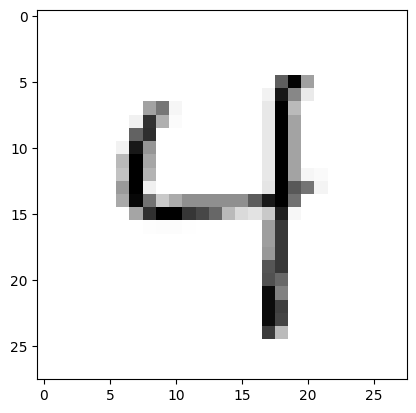

In [3]:
dataiter = iter(trainloader)
images, tags = dataiter.__next__()
plt.imshow(images[0].numpy().squeeze(), cmap="gray_r")

In [ ]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(28*28, 128) #1*28*28 
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)     
        
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return F.log_softmax(x,dim=1)
        

In [28]:
def train(model, trainloader, device):
    inicio = time()

    optimizer = optim.SGD(model.parameters(), lr= 0.01, momentum=0.5)
    
    criterion = nn.NLLLoss()
    num_epochs = 30
    model.train()
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        
        for images, label in trainloader:
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            
            output = model(images.to(device))
            loss = criterion(output, label.to(device))
            loss.backward()
            
            optimizer.step()
            
            running_loss += loss.item()
            
    print(f'Epoch:{num_epochs}, Loss:{running_loss/len(trainloader)}')
    print(f'Tempo total de treno: {(time()-inicio)/60}')

In [29]:
def validation(model,valloader, device):
    correct_pred, total_pred = 0,0
    
    for image, label in valloader:
        for i in range(len(label)):
            img = image[i].view(1,784)
            
            with torch.no_grad():
                logps = model(img.to(device))
                
            ps = torch.exp(logps)
            prob = list(ps.cpu().numpy()[0])
            label_pred = prob.index(max(prob))
            label_real = label.numpy()[i]
            if(label_pred ==label_real):
                correct_pred+=1
            total_pred+=1
            
    print(f'Total de imagens testadas: {total_pred}')
    print(f'Precisão do modelo: {correct_pred*100/total_pred}%')
                
            

In [30]:
device = torch.device('cuda') if torch.cuda.is_available() else "cpu"
model = Modelo()
model.to(device)
train(model,trainloader,device)

Epoch:30, Loss:0.04379018997080497
Tempo total de treno: 6.000749504566192


In [31]:
validation(model, valloader, device)

Total de imagens testadas: 10000
Precisão do modelo: 97.61%
